In [3]:

import numpy as np
import pandas as pd
def get_accuracy_bandit(fp, best_arm_indexes):
    df = pd.read_csv(fp)
    df = df[['num_sims', 'horizon', 'chosen_arm']]
    n_simulations = int(np.max(df['num_sims'])) + 1
    time_horizon = int(np.max(df['horizon'])) + 1
    best_arms = np.zeros((n_simulations, time_horizon))  
    for n in range(int(n_simulations)):
        data = np.array(list(df.loc[df['num_sims'] == n]['chosen_arm']))
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            best_arms[n, t] = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
    isinfunc = lambda x: x in best_arm_indexes
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    probs = boo.sum(axis=0)/n_simulations
    return probs
fp = r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\deoxyfluorination_bayes_ucb_gaussian\log.csv'
deoxyf = get_accuracy_bandit(fp, best_arm_indexes=[14, 19])
print(deoxyf)


def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions=['BTMG+PBSF','BTPP+PBSF']
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Deoxyfluorination\results\Gaussian_process_history_400_Morgan.csv'
deoxyf_gaussian=get_accuracy_bandit_model(fp, best_conditions)
print(deoxyf_gaussian)


deoxyf_baseline=np.load(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\deoxyfluorination_etc.npy')
deoxyf_baseline=deoxyf_baseline[:100]
print(deoxyf_baseline)


[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.0525 0.0575 0.0625 0.0675 0.0375 0.1
 0.21   0.2225 0.2125 0.2475 0.2775 0.2575 0.2925 0.265  0.285  0.3075
 0.3175 0.33   0.3175 0.365  0.37   0.395  0.4075 0.4175 0.405  0.425
 0.43   0.4325 0.445  0.425  0.4525 0.4425 0.4275 0.4375 0.4575 0.4625
 0.475  0.5    0.505  0.515  0.5325 0.52   0.5175 0.52   0.515  0.54
 0.54   0.545  0.5625 0.555  0.5475 0.54   0.5525 0.56   0.5675 0.5825
 0.5925 0.595  0.5975 0.5925 0.605  0.595  0.6125 0.6125 0.6225 0.625
 0.6375 0.64   0.6425 0.6325 0.645  0.6525 0.66   0.655  0.6575 0.6625
 0.6725 0.665  0.6825 0.68   0.695  0.6925 0.705  0.715  0.7225 0.7225]
0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.7875
96    0.7850
97    0.7875
98    0.7950
99    0.7900
Length: 100, dtype: float64
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.   

In [4]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions=['Cy-JohnPhos','P(p-Anis)3','PPh2Cy']
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Ni-catalyzed borylation\results\svm_history_500_mordred_beta.csv'
nickel = get_accuracy_bandit_model(fp, best_conditions)
print(nickel)  


nib_etc_baseline = np.load(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\nickel_borylation_etc.npy')
nib_etc_baseline=nib_etc_baseline[:100]
print(nib_etc_baseline)

import numpy as np
import pandas as pd
def get_accuracy_bandit(fp, best_arm_indexes):
    df = pd.read_csv(fp)
    df = df[['num_sims', 'horizon', 'chosen_arm']]
    n_simulations = int(np.max(df['num_sims'])) + 1
    time_horizon = int(np.max(df['horizon'])) + 1
    best_arms = np.zeros((n_simulations, time_horizon))  
    for n in range(int(n_simulations)):
        data = np.array(list(df.loc[df['num_sims'] == n]['chosen_arm']))
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            best_arms[n, t] = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
    isinfunc = lambda x: x in best_arm_indexes
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    probs = boo.sum(axis=0)/n_simulations
    return probs
fp = r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\nickel_borylation_bayes_ucb_beta\log.csv'
nickel_gaussian = get_accuracy_bandit(fp, best_arm_indexes=[4, 16, 18])
print(nickel_gaussian)

[0.    0.    0.    0.    0.216 0.174 0.128 0.14  0.092 0.108 0.108 0.07
 0.068 0.054 0.068 0.048 0.124 0.094 0.136 0.156 0.162 0.132 0.142 0.05
 0.124 0.182 0.204 0.166 0.16  0.172 0.174 0.216 0.242 0.222 0.234 0.276
 0.28  0.312 0.368 0.39  0.418 0.46  0.47  0.516 0.556 0.594 0.606 0.624
 0.632 0.674 0.682 0.694 0.712 0.728 0.724 0.746 0.734 0.754 0.756 0.76
 0.778 0.792 0.792 0.798 0.8   0.8   0.814 0.812 0.822 0.83  0.83  0.832
 0.836 0.838 0.838 0.848 0.846 0.856 0.854 0.854 0.854 0.864 0.864 0.862
 0.868 0.872 0.872 0.876 0.878 0.878 0.878 0.886 0.888 0.894 0.896 0.9
 0.894 0.902 0.912 0.914]
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.2235 0.2235 0.2235 0.2235 0.2235 0.2235 0.2235
 0.2235 0.2235 0.2235 0.2235 0.2235 0.2235 0.2235 0.2235 0.2235 0.2235
 0.2235 0.2235 0.2235 0.2235 0.2235 0.2235 0.3166 0.3166 0.3166 0.3166
 0.3166 0.3166 0.3166 0.3166 0.3166 0.3166 0.316

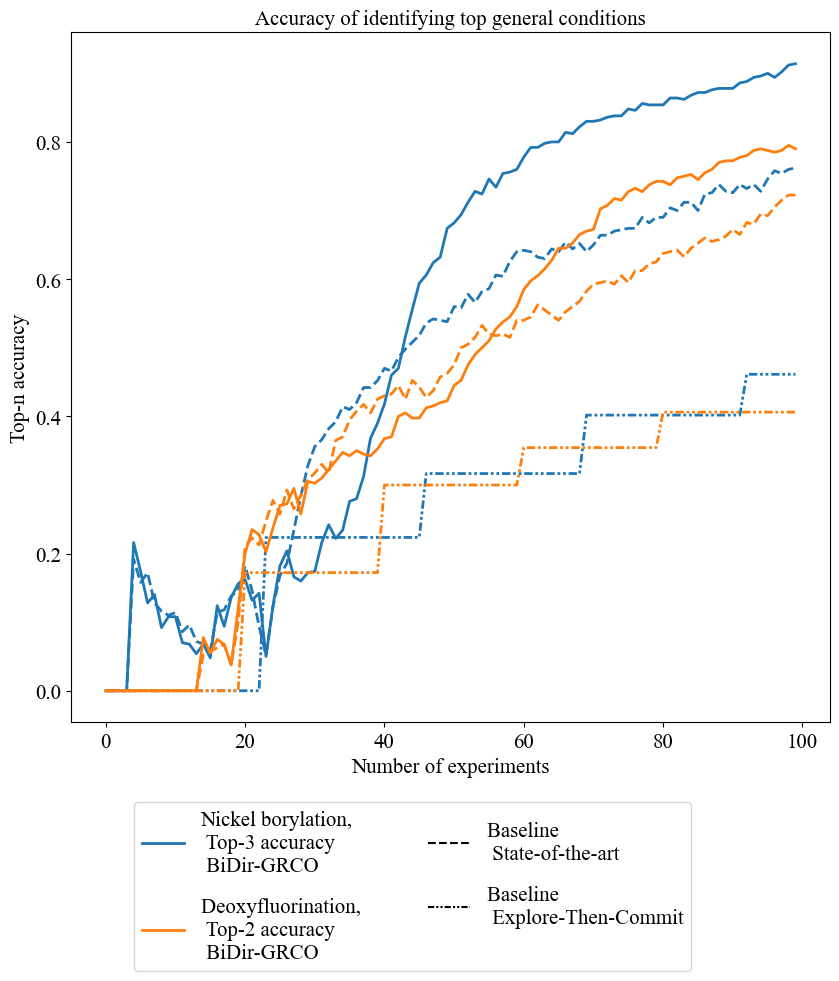

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8.5,10))
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['Arial']
plt.rc('font', family='Times New Roman')
legends = [
    'Nickel borylation, \n Top-3 accuracy \n BiDir-GRCO',
    'Deoxyfluorination, \n Top-2 accuracy \n BiDir-GRCO',
]

# plt.rcParams['savefig.dpi'] = 300

plt.plot(nickel, label=legends[0], color='#1f77b4', alpha=1, lw=2)
plt.plot(nickel_gaussian, color='#1f77b4', ls='--', alpha=1, lw=2)
plt.plot(nib_etc_baseline, color='#1f77b4', ls=(0, (3, 1, 1, 1, 1, 1)), alpha=1, lw=2)

plt.plot(deoxyf_gaussian, label=legends[1], color='#ff7f0e', alpha=1, lw=2)
plt.plot(deoxyf, color='#ff7f0e', ls='--', alpha=1, lw=2)
plt.plot(deoxyf_baseline, color='#ff7f0e', ls=(0, (3, 1, 1, 1, 1, 1)), alpha=1, lw=2)

plt.plot([], label='Baseline \n State-of-the-art', ls='--', color='k')
plt.plot([], label='Baseline \n Explore-Then-Commit', ls=(0, (3, 1, 1, 1, 1, 1)), color='k')

# plt.grid(visible=True, which='both', alpha=0.5)
plt.xlabel('Number of experiments', fontsize=15)
plt.ylabel('Top-n accuracy', fontsize=15)


plt.legend(
    bbox_to_anchor=(0.45, -0.1),  
    loc="upper center",         
    labelspacing=1,             
    ncols=2,                   
    columnspacing=3,             
    fontsize=15                  
)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.title('Accuracy of identifying top general conditions', fontsize=15)

plt.tight_layout()
plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\4_c_the.png', 
            format='png', bbox_inches='tight',dpi=500)
plt.show()
